In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('E:\Projects\Data Science Projects\Data Science Salary\Cleaned Salary Data.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_text,job_state,same_state,age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

# Job title & seniority
# Fix state LA
# Job description length
# Competitor count
# Hourly wage


In [6]:
df['job_simp']= df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [8]:
df['seniority']= df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [10]:
# Fix State LA

df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [11]:
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
IN     10
UT     10
MO      9
AZ      9
AL      8
GA      6
MI      6
DE      6
KY      6
CT      5
IA      5
LA      4
OR      4
NE      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: job_state, dtype: int64

In [12]:
#Job Description length
df['desc_len']= df['Job Description'].apply(lambda x: len(x))

In [13]:
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [14]:
#Competitor Count
df['num_Competitors']= df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [15]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [16]:
#Hourly wage to annual
df['min_salary']=df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)


In [17]:
#Hourly wage to annual
df['max_salary']=df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)

In [18]:
df[df.hourly==1][['hourly','min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'num_Competitors'],
      dtype='object')

In [20]:
df.company_text

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_text, Length: 742, dtype: object

In [21]:
df['company_txt']=df.company_text.apply(lambda x: x.replace('\n', ''))

In [22]:
df['company_text']

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_text, Length: 742, dtype: object

In [23]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn,desc_len,num_Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot:>

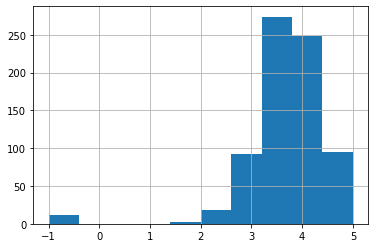

In [24]:
df.Rating.hist()

<AxesSubplot:>

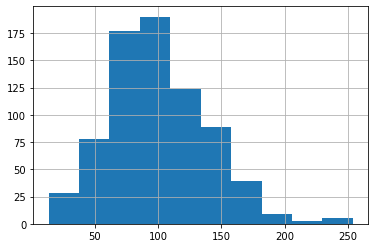

In [25]:
df.avg_salary.hist()

<AxesSubplot:>

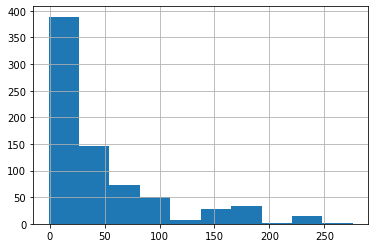

In [26]:
df.age.hist()

<AxesSubplot:>

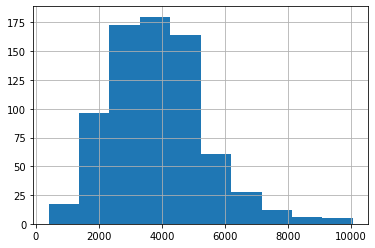

In [27]:
df.desc_len.hist()

<AxesSubplot:>

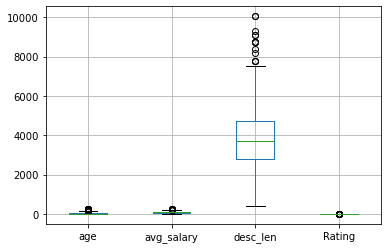

In [28]:
df.boxplot(column= ['age', 'avg_salary', 'desc_len', 'Rating'])

In [29]:
df[['age', 'avg_salary', 'desc_len', 'Rating']].corr()

,age,avg_salary,desc_len,Rating
age,1.000000,0.019655,0.163911,0.021655
avg_salary,0.019655,1.000000,0.078808,0.013492
desc_len,0.163911,0.078808,1.000000,-0.012281
Rating,0.021655,0.013492,-0.012281,1.000000


<AxesSubplot:>

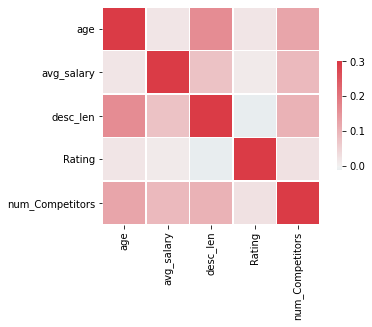

In [30]:
cmap= sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'avg_salary', 'desc_len', 'Rating', 'num_Competitors']].corr(), cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
df_cat=df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_text', 'job_state', 'same_state', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'num_Competitors', 'company_txt'],
      dtype='object')

Garph for Location: total= 200


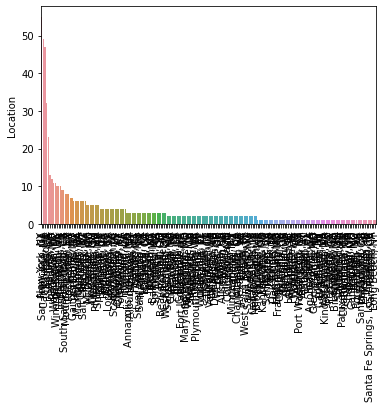

Garph for Headquarters: total= 198


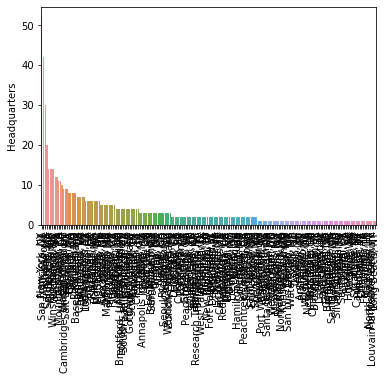

Garph for Size: total= 9


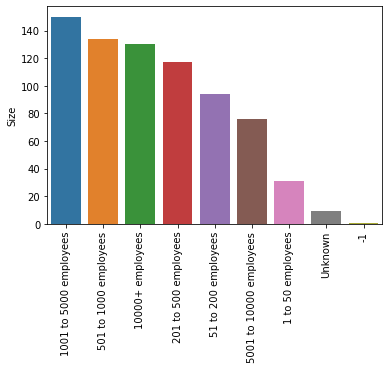

Garph for Type of ownership: total= 11


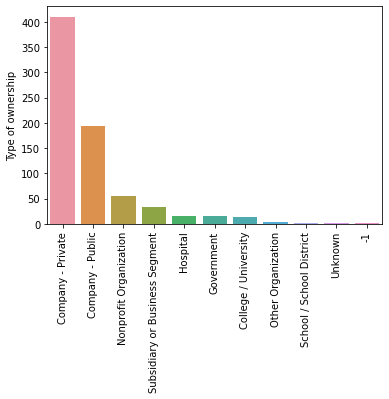

Garph for Industry: total= 60


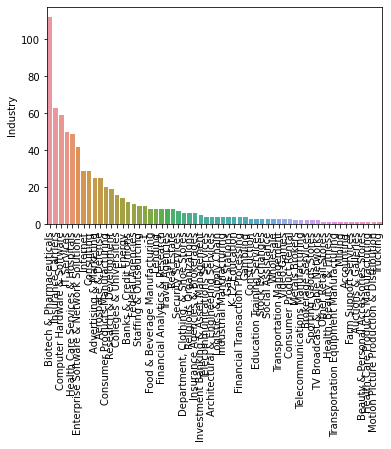

Garph for Sector: total= 25


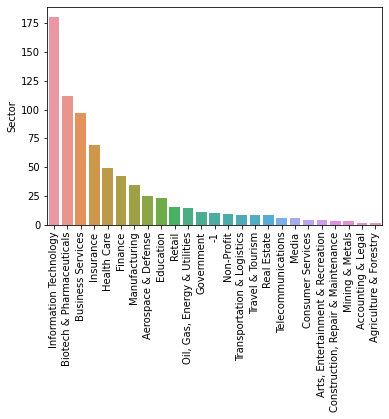

Garph for Revenue: total= 14


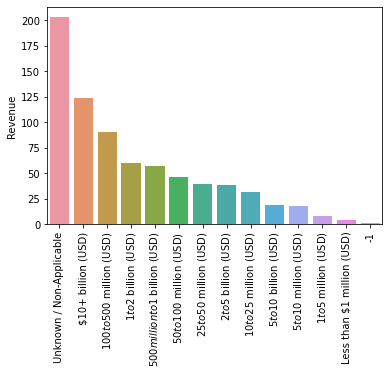

Garph for company_text: total= 343


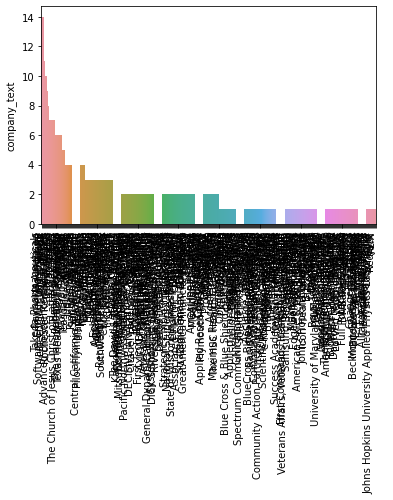

Garph for job_state: total= 37


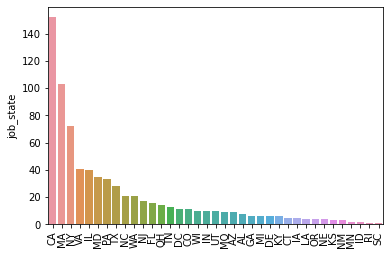

Garph for same_state: total= 2


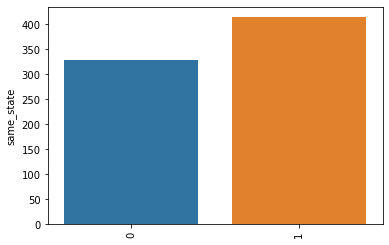

Garph for python_yn: total= 2


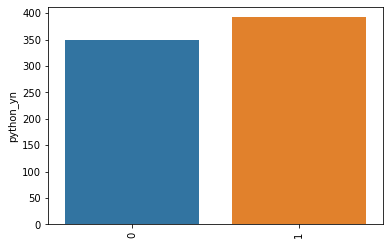

Garph for rstudio_yn: total= 2


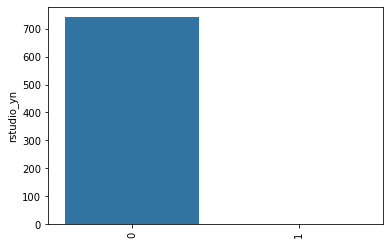

Garph for spark_yn: total= 2


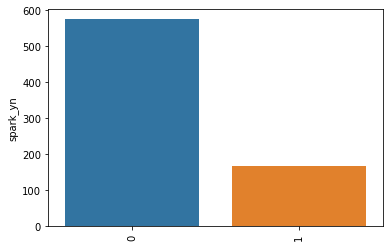

Garph for aws_yn: total= 2


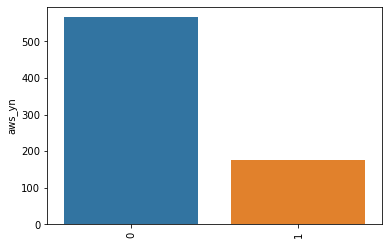

Garph for excel_yn: total= 2


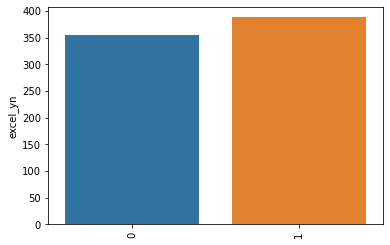

Garph for job_simp: total= 7


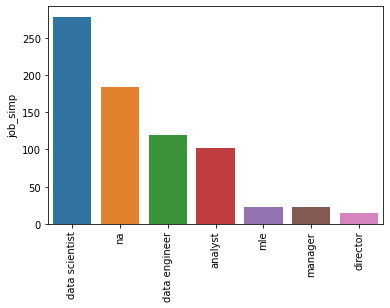

Garph for seniority: total= 3


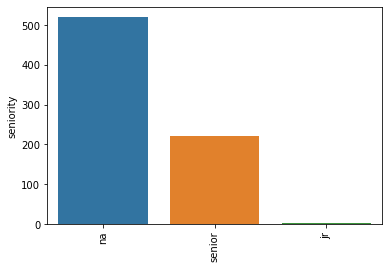

In [37]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("Garph for %s: total= %d" % (i, len(cat_num)))
    chart=sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Garph for Location: total= 20


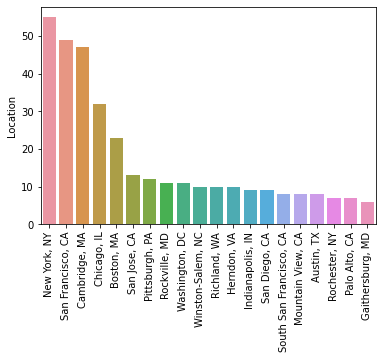

Garph for Headquarters: total= 20


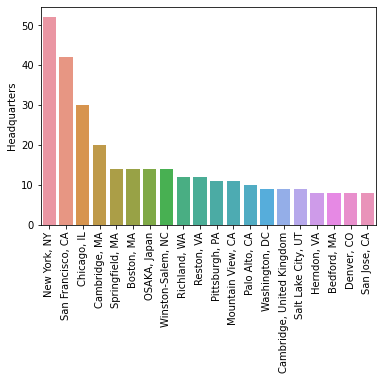

Garph for company_text: total= 20


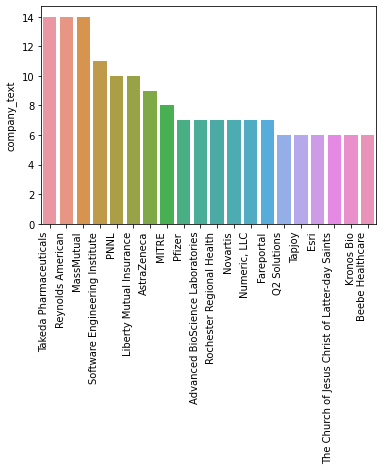

In [40]:
for i in df_cat[['Location', 'Headquarters', 'company_text']].columns:
    cat_num=df_cat[i].value_counts()[:20]
    print("Garph for %s: total= %d" % (i, len(cat_num)))
    chart=sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [41]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'num_Competitors', 'company_txt'],
      dtype='object')

In [42]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [43]:
pd.pivot_table(df, index=['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [51]:
pd.pivot_table(df, index=['job_state','job_simp'], values='avg_salary', aggfunc='count').sort_values('avg_salary', ascending=False)

avg_salary
job_state job_simp                  
CA        data scientist          68
MA        na                      46
NY        data scientist          40
MA        data scientist          30
CA        na                      27
          data engineer           25
VA        data scientist          18
CA        analyst                 18
WA        data scientist          17
MD        na                      16
IL        data scientist          15
NY        analyst                 14
MD        data scientist          13
TX        data scientist          13
NC        na                      12
MA        data engineer           12
NY        na                      12
VA        data engineer           10
TN        data engineer           10
CA        manager                  9
IL        data engineer            8
TX        data engineer            8
PA        na                       8
          analyst                  8
          mle                      7
TX        na                       7
FL        data scientist           7
OH        data scientist           7
NC        data engineer            6
MA        director                 6
IL        na                       6
          director                 6
NJ        analyst                  6
FL        analyst                  6
DE        na                       6
PA        data scientist           6
VA        analyst                  6
DC        data scientist           5
CA        mle                      5
AZ        data engineer            5
MA        manager                  5
VA        na                       5
AL        analyst                  5
NY        data engineer            4
OH        analyst                  4
NJ        data scientist           4
NE        na                       4
UT        analyst                  4
MI        data scientist           4
MA        analyst                  4
KY        na                       4
DC        data engineer            4
IN        data engineer            4
          na                       4
WI        na                       4
MD        data engineer            3
NM        data scientist           3
IA        data engineer            3
GA        data scientist           3
OH        na                       3
OR        data scientist           3
FL        data engineer            3
PA        manager                  3
CT        na                       3
CO        na                       3
          data scientist           3
          data engineer            3
UT        data engineer            3
          data scientist           3
WA        analyst                  3
WI        analyst                  3
          data scientist           3
IL        analyst                  3
GA        na                       3
MD        analyst                  3
MO        data scientist           3
          na                       3
KS        mle                      3
NC        data scientist           3
TN        analyst                  2
MO        analyst                  2
VA        mle                      2
CT        data scientist           2
NJ        manager                  2
AL        na                       2
DC        analyst                  2
LA        data engineer            2
IN        data scientist           2
KY        data scientist           2
MI        manager                  2
NJ        data engineer            2
IA        analyst                  2
NY        mle                      2
IL        mle                      2
ID        analyst                  2
NJ        director                 2
AZ        na                       2
WA        na                       1
CO        analyst                  1
MN        analyst                  1
AL        data engineer            1
AZ        analyst                  1
          data scientist           1
NJ        na                       1
MN        data engineer            1
MO        manager                  1
CO        mle                 

In [49]:
pd.set_option('display.max_rows', None)

In [52]:
pd.pivot_table(df[df.job_simp=='data scientist'], index=['job_state','job_simp'], values='avg_salary').sort_values('avg_salary', ascending=False)

,,avg_salary
job_state,job_simp,
DC,data scientist,149.000000
CA,data scientist,142.522059
UT,data scientist,140.500000
MO,data scientist,127.666667
IL,data scientist,117.233333
NC,data scientist,117.000000
NY,data scientist,115.250000
MA,data scientist,113.750000
WI,data scientist,113.500000


In [69]:
df_pivot=df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_Competitors', 'hourly', 'employer_provided', 'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership', 'avg_salary']]

In [56]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'num_Competitors', 'company_txt'],
      dtype='object')

In [70]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot, index =i, values='avg_salary').sort_values(i, ascending=False))

Rating
        avg_salary
Rating            
 5.0    134.700000
 4.8     80.277778
 4.7    103.983871
 4.6     97.250000
 4.5    117.714286
 4.4    108.606061
 4.3    102.468750
 4.2    100.442308
 4.1    116.368421
 4.0    105.340426
 3.9    113.071429
 3.8     96.811475
 3.7    104.131148
 3.6     85.467391
 3.5    104.897959
 3.4     93.011364
 3.3    101.858974
 3.2    105.500000
 3.1     86.580000
 3.0     85.588235
 2.9     81.138889
 2.8     83.928571
 2.7     83.250000
 2.6    109.083333
 2.5    120.000000
 2.4     60.214286
 2.3     81.500000
 2.2     97.750000
 2.1     95.900000
 1.9     87.500000
-1.0    136.181818
Industry
                                          avg_salary
Industry                                            
Wholesale                                 103.166667
Video Games                               106.166667
Trucking                                   79.000000
Travel Agencies                            69.500000
Transportation Management              

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [71]:
pd.pivot_table(df_pivot, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [72]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

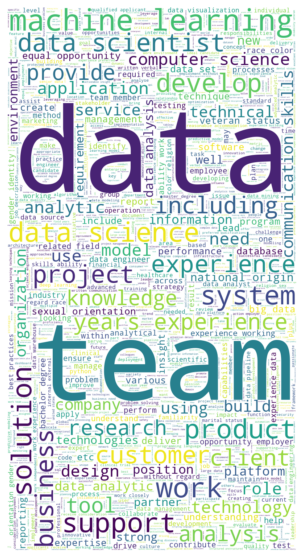

In [76]:
words= " ".join(df['Job Description'])

def punctuation_stop(text):
    filtered=[]
    stop_words=set(stopwords.words('english'))
    word_tokens=word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered= punctuation_stop(words)

text=" ".join([ele for ele in words_filtered])
wc= WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [75]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True